## CS 372

### Assignment 2 - Decision Trees

- Grace Biggs

- Brandon L'Abbe

- Lane Thompson

- Zhiyi Zhan

Dataframe: 
   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   47        23.0     148     94551       2    7.5  Undergrad         0   
1   48        24.0      71     93117       2    1.7  Undergrad       145   
2   62        37.0      58     91320       4    1.7  Undergrad         0   
3   57        32.0      28     95831       3    0.2  Undergrad         0   
4   51        26.0      70     90089       1    1.2  Undergrad       169   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           1       1           1  
1              0                   0           0       0           1  
2              0                   0           0       1           0  
3              0                   0           0       1           1  
4              0                   0           0       0           0  
Number of Duplicates: 
0
Age                   0
Experience            2
Income                0
ZIP Code

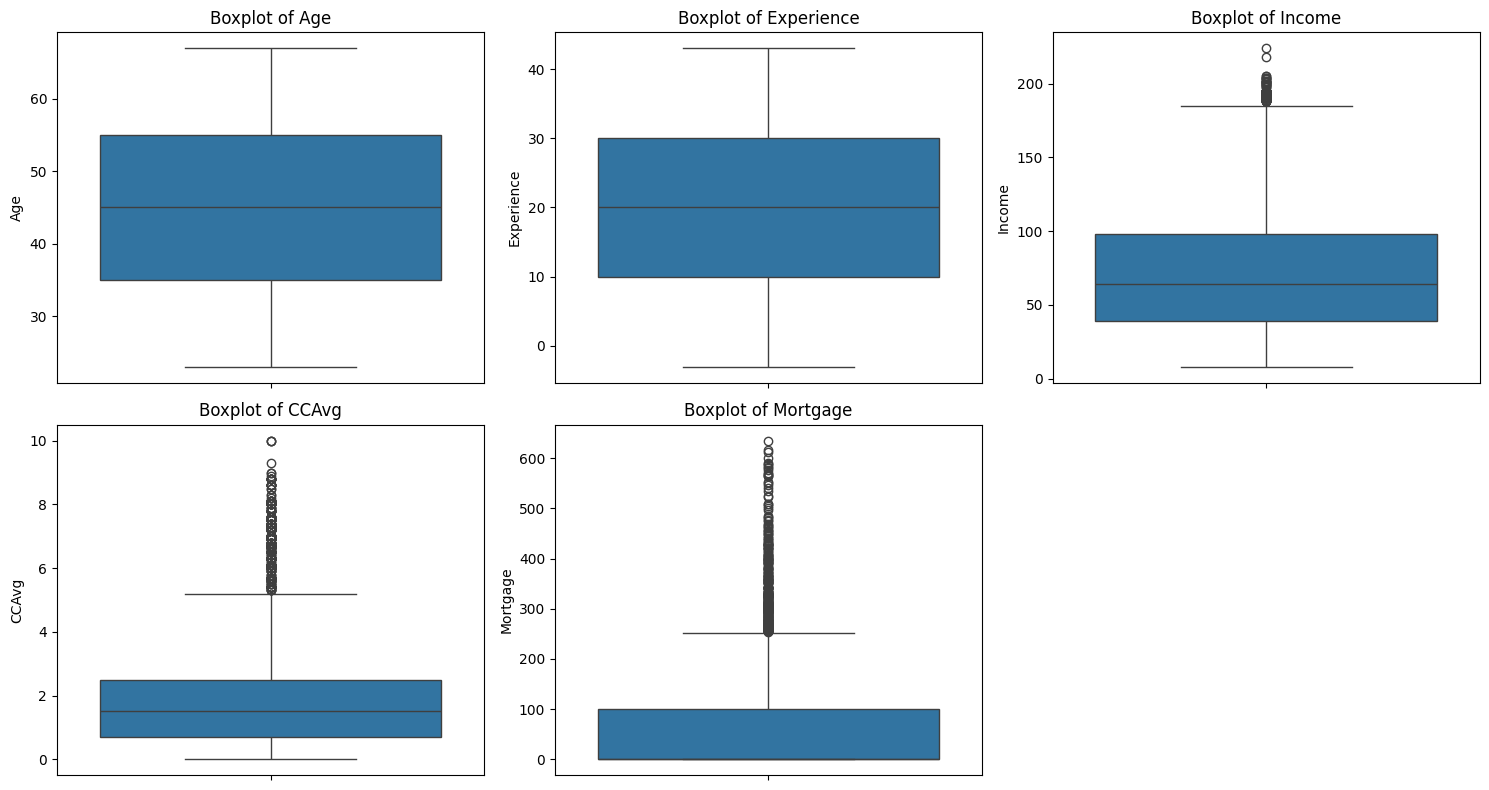

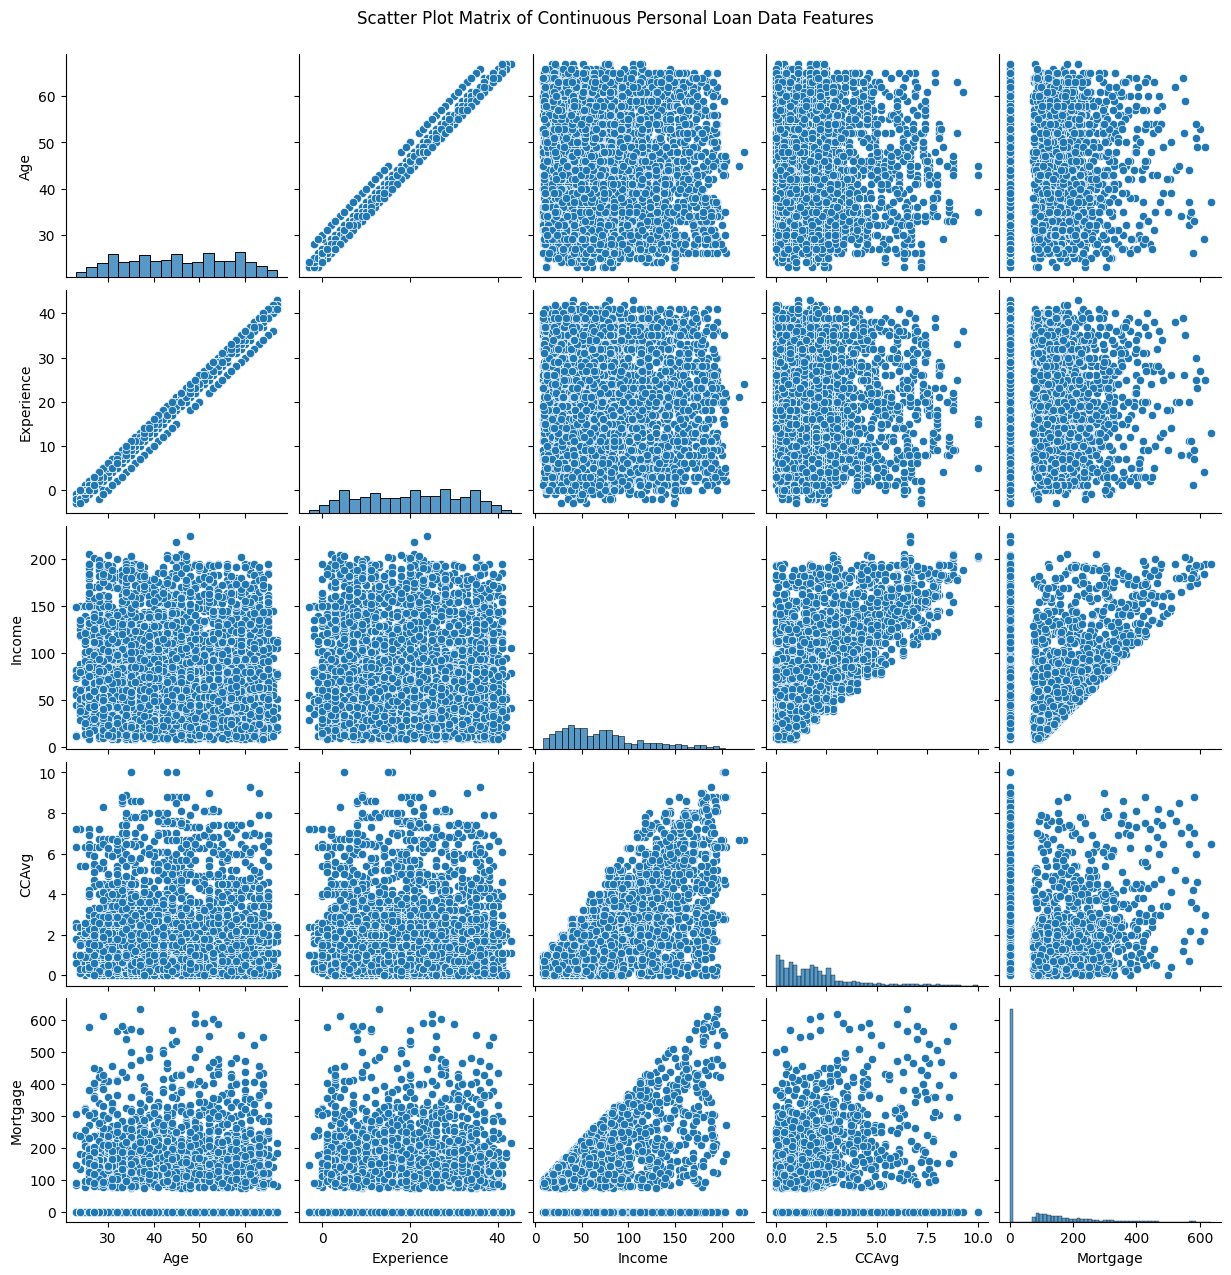

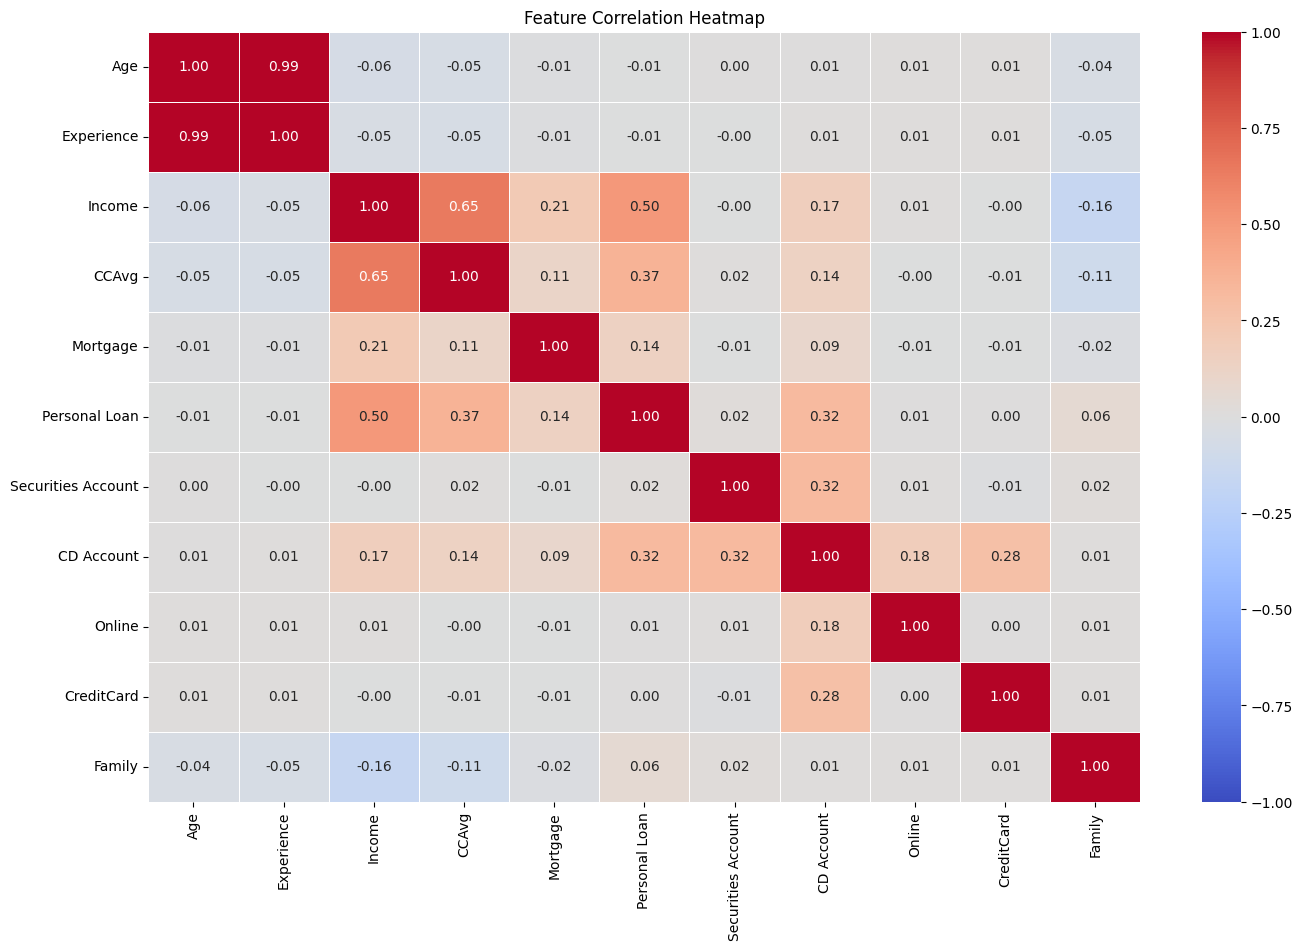

In [11]:
# Exploratory Data Analysis (Grace Biggs)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Personal Loan Data_DT.xlsx', sheet_name='Data')
df = df.drop(columns=['ID'])
# Drop ID column - provides no useful info.
# Binary: Personal Loan, Securities Account, CD Account, Online, Credit Card
# Continuous: Age, Experience, Income, CCAvg, Mortgage
# Ordinal: Family
# Categorical: Education
# Other: ZIP Code

print("Dataframe: ")
print(df.head())
print("Number of Duplicates: ")
print(df.duplicated().sum()) # Should be 0
print(df.isnull().sum()) # 2 missing experience, 4 missing education
# We're making a Decision Tree from this dataset of 5000 rows. Because only 6 rows (0.12%) are missing data, we can safely drop them.
df = df.dropna()

# Check for outliers with Boxplots. 
continuous_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15,8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# How do we deal with outliers? Do nothing? Pre-pruning? Post-pruning?

# Draw scatter plot matrix for all features. Comment.
sns.pairplot(df[continuous_vars])
plt.suptitle('Scatter Plot Matrix of Continuous Personal Loan Data Features', y=1.02)
plt.show()

# Draw a heatmap plot between features. Comment.
binary_vars = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
ordinal_vars = ['Family']
numeric_vars = continuous_vars + binary_vars + ordinal_vars

plt.figure(figsize=(16,10))
sns.heatmap(df[numeric_vars].corr(), annot=True, fmt=".2f", 
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()